In [ ]:
import nltk
from nltk.corpus import words

nltk.download('words')

In [7]:
import random
import nltk
from nltk.corpus import words

all_words = words.words()

# 랜덤 단어 생성
def generate_random_words(number_of_words):
    random_words = random.choices(all_words, k=number_of_words)
    return ''.join(random_words)


In [8]:
#시저 암호화
def caesar_encrypt(sentence, n):
    shift = random.randint(1,n)
    print(f'사용할 랜덤키: {shift}\n')
    result=''
    for char in sentence:
        char_code = ord(char) + shift
        if char.isupper():
            if char_code > ord('Z'):
                char_code -= 26
        elif char.islower():
            if char_code > ord('z'):
                char_code -= 26
        result += chr(char_code)
    return result


In [9]:
#복호화
def caesar_decrypt(sentence,n):
    result=[]
    for i in range(1,n+1):
        shift = i
        decrypted_sentence = ''
        for char in sentence:
            char_code = ord(char) - shift
            if char.isupper():
                if char_code < ord('A'):
                    char_code += 26
            elif char.islower():
                if char_code < ord('a'):
                    char_code += 26
            decrypted_sentence += chr(char_code)
        result.append(decrypted_sentence)
    return result
    

In [10]:
# 복호화시에 words.txt 파일을 단어 데이터베이스로 사용
possible_words = set()
with open('words.txt', 'r') as file:
    for line in file:
        possible_words.add(line.strip())

# 단어 분리 함수
def split_words(sentence, start, result):
    
    # start 인덱스가 문장 마지막 글자의 인덱스를 넘은 경우 -> 직전의 루프가 마지막 글자를 포함시킨 단어를 찾았음을 의미
    if start == len(sentence):
        return True #작업을 마치기 위한 True 반환
    
    for end in range(start + 1, len(sentence) + 1):

        # 단일 알파벳은 단어로 취급하지 않도록 하며, 문장 중 일부가 단어 목록에 존재하면 result에 추가
        if len(sentence[start:end]) > 1 and sentence[start:end] in possible_words:
            result.append(sentence[start:end])
            
            # 나머지 부분도 단어로 성공적으로 분리할 수 있는지 확인
            if split_words(sentence, end, result):
                return True
            else:
                result.pop()  # 나머지를 단어로 분리할 수 없는 경우, 결과에서 제거하고 다른 옵션 시도
    
    # 현재 남은 글자들에서는 그 어떤 단어도 분리시킬 수 없던 경우 False 리턴
    return False

# 단어 분리 함수를 이용해 문장이 단어들로 이루어져 있는지 검사하고 결과를 반환하는 함수
def check_words(sentence):
    result = []
    if split_words(sentence, 0, result):
        return ' '.join(result)


In [11]:
import time
import pandas as pd

n_and_time_data = []

try:
    for n in range(1, 26):
        print(f'100회 수행시 생성될 랜덤키의 범위 : {n}\n')
        times_for_n = []  # n값별 소요 시간을 저장하는 리스트

        for _ in range(100):
            start_time = time.time()

            if sum(times_for_n) > 3600:
                raise TimeoutError('복호화에 너무 오랜 시간이 소요되어 중단하였습니다.')

            sentence = generate_random_words(10)
            print('생성한 문장: ' + sentence + '\n')

            encrypted_sentence = caesar_encrypt(sentence, n)
            print('암호화 후: ' + encrypted_sentence + '\n')

            decrypted_list = caesar_decrypt(encrypted_sentence, n)
            print('복호화된 문장 후보들: ')
            print(decrypted_list)
            print('\n')

            # 해독 실행
            possible_sentences = []  # 자동 해독 결과를 모아놓을 리스트

            print('복호화된 문장 중에서 실제 가능성 있는 문장을 판별중입니다.')
            for decrypted_sentence in decrypted_list:
                result = check_words(decrypted_sentence)
                if result is not None:
                    possible_sentences.append(decrypted_sentence + '\n => 자동 해독 결과: ' + result)

            # 1회별 소요 시간 저장
            end_time = time.time()
            total_time = end_time - start_time
            times_for_n.append(total_time)

            if not possible_sentences:
                print('\n자동 해독 결과로 추천할 만한 문장이 없습니다.')
            else:
                print('\n가능성 있는 문장이 검출되었습니다.')
                for possible_sentence in possible_sentences:
                    print('\n' + possible_sentence + ' 일 가능성이 있습니다.')
            print('\n-------------------------------------------------------------------------------------\n')

        # 100회의 평균 소요 시간 계산
        average_time_for_n = sum(times_for_n) / len(times_for_n)
        n_and_time_data.append((n, average_time_for_n))

except TimeoutError as e: #시간초과시에도 해당 평균 소요시간 저장
    print(e)
    average_time_for_n = sum(times_for_n) / len(times_for_n)
    n_and_time_data.append((n, average_time_for_n))


df = pd.DataFrame(n_and_time_data, columns=['shift(n값)', '평균 소요 시간(초)'])
df.to_excel('caesar_times.xlsx', index=False)

for n, time in n_and_time_data:
    print(f'n = {n}, 평균 실행 시간: {time}초')

100회 수행시 생성될 랜덤키의 범위 : 1

생성한 문장: preavowalundersetnonbroodinessbibliotherapistrhagoseappeasablenessbarometricArnebunalertlypoundstone

사용할 랜덤키: 1

암호화 후: qsfbwpxbmvoefstfuopocsppejofttcjcmjpuifsbqjtusibhptfbqqfbtbcmfofttcbspnfusjdBsofcvobmfsumzqpvoetupof

복호화된 문장 후보들: 
['preavowalundersetnonbroodinessbibliotherapistrhagoseappeasablenessbarometricArnebunalertlypoundstone']


복호화된 문장 중에서 실제 가능성 있는 문장을 판별중입니다.

가능성 있는 문장이 검출되었습니다.

preavowalundersetnonbroodinessbibliotherapistrhagoseappeasablenessbarometricArnebunalertlypoundstone
 => 자동 해독 결과: preavowal underset non brood in ess bibliotherapist rhagose appeasable ness barometric Arne bun alert ly pounds tone 일 가능성이 있습니다.

-------------------------------------------------------------------------------------

생성한 문장: Otidiphapsmuletressfecundizewrylyallegesupergaietyrabattementultrapopishunshrinkableflowable

사용할 랜덤키: 1

암호화 후: Pujejqibqtnvmfusfttgfdvoejafxszmzbmmfhftvqfshbjfuzsbcbuufnfouvmusbqpqjtivotisjolbcmfgmpxbcmf

복호화된 문장 후보들: 
['Ot

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



복호화된 문장 후보들: 
['dmuafgavgjsfywjqhshsdarwugeegfkwfkatdqkuzaklgkughwnsmflxmdsjuznsehajwLzsjwfxdgsltgsjvVaggf', 'cltzefzufirexvipgrgrczqvtfddfejvejzscpjtyzjkfjtfgvmrlekwlcritymrdgzivKyrivewcfrksfriuUzffe', 'bksydeytehqdwuhofqfqbypuseccediudiyrboisxyijeisefulqkdjvkbqhsxlqcfyhuJxqhudvbeqjreqhtTyeed', 'ajrxcdxsdgpcvtgnepepaxotrdbbdchtchxqanhrwxhidhrdetkpjciujapgrwkpbexgtIwpgtcuadpiqdpgsSxddc', 'ziqwbcwrcfobusfmdodozwnsqcaacbgsbgwpzmgqvwghcgqcdsjoibhtizofqvjoadwfsHvofsbtzcohpcofrRwccb', 'yhpvabvqbenatrelcncnyvmrpbzzbafrafvoylfpuvfgbfpbcrinhagshynepuinzcverGunerasybngobneqQvbba', 'xgouzaupadmzsqdkbmbmxulqoayyazeqzeunxkeotuefaeoabqhmgzfrgxmdothmybudqFtmdqzrxamfnamdpPuaaz', 'wfntyztozclyrpcjalalwtkpnzxxzydpydtmwjdnstdezdnzapglfyeqfwlcnsglxatcpEslcpyqwzlemzlcoOtzzy', 'vemsxysnybkxqobizkzkvsjomywwyxcoxcslvicmrscdycmyzofkexdpevkbmrfkwzsboDrkboxpvykdlykbnNsyyx', 'udlrwxrmxajwpnahyjyjurinlxvvxwbnwbrkuhblqrbcxblxynejdwcodujalqejvyranCqjanwouxjckxjamMrxxw', 'tckqvwqlwzivomzgxixitqhmkwuuwvamvaqjtgakpqab

<h2>결과 분석</h2>

    shift(n값)  평균 소요 시간(초)
0           1     0.001953
1           2     0.000844
2           3     0.000591
3           4     0.001024
4           5     0.001422
5           6     0.001075
6           7     0.001349
7           8     0.001046
8           9     0.001740
9          10     0.001065
10         11     0.001468
11         12     0.001508
12         13     0.001452
13         14     0.002551
14         15     0.001672
15         16     0.001748
16         17     0.001717
17         18     0.002185
18         19     0.002231
19         20     0.002526
20         21     0.002236
21         22     0.002400
22         23     0.002498
23         24     0.006122
24         25     0.003209


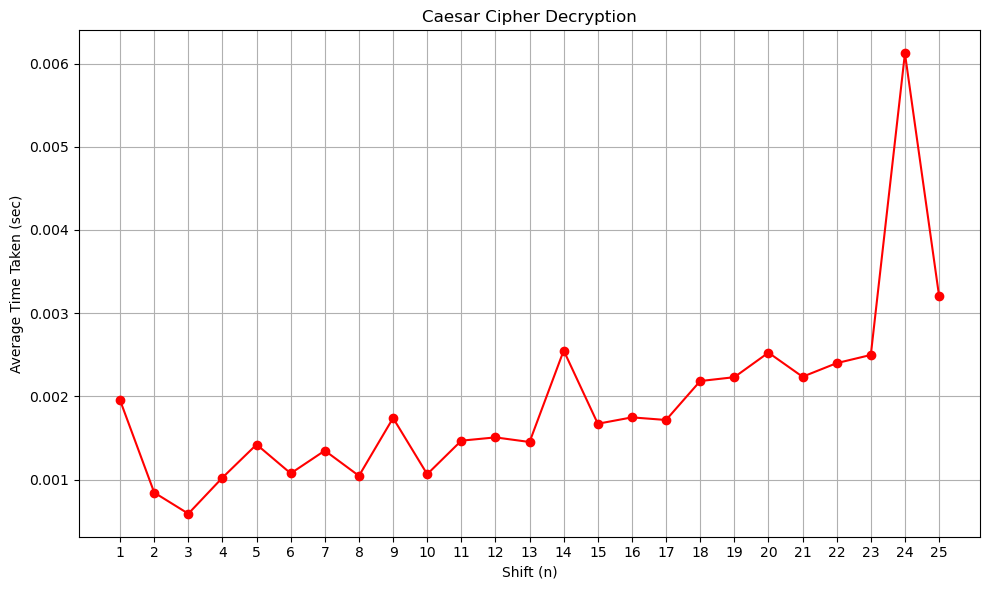

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('caesar_times.xlsx')

print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['shift(n값)'], df['평균 소요 시간(초)'], marker='o', linestyle='-', color='r')

plt.title('Caesar Cipher Decryption')
plt.xlabel('Shift (n)')
plt.ylabel('Average Time Taken (sec)')
plt.grid(True)
plt.xticks(df['shift(n값)'])
plt.tight_layout()
plt.show()
